#K-Nearest Neighbours

###Cloning the repositiory containing the dataset

In [1]:
!git clone https://github.com/Yuvnish017/Machine_Learning.git

Cloning into 'Machine_Learning'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 30 (delta 3), reused 29 (delta 2), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [2]:
%cd Machine_Learning/K_Nearest_Neighbours/

/content/Machine_Learning/K_Nearest_Neighbours


###Importing Necessary Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

###Loading the Dataset

In [73]:
data = pd.read_csv('diabetes.csv')

In [74]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset has no rows with Null values so no need to drop any row

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Sampling the dataset for Balancing the Dataset

In [76]:
data = data.groupby('Outcome').sample(500, replace=True)

Data Distribution in the Dataset

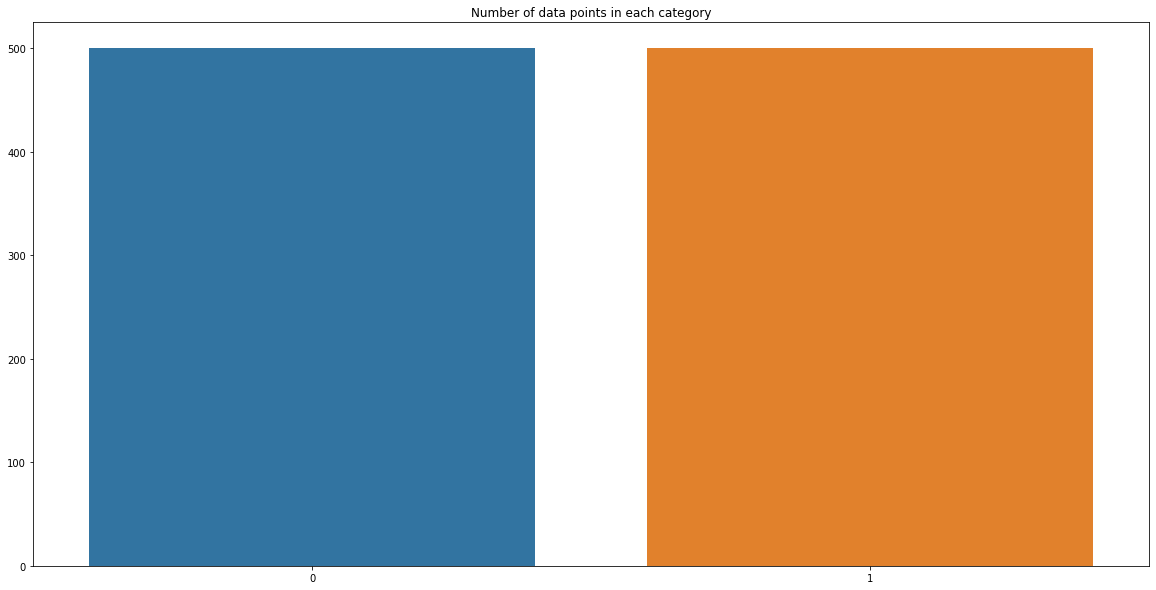

In [77]:
unique, count = np.unique(data['Outcome'], return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique, y=count).set_title('Number of data points in each category')
plt.show()

In [78]:
y = data['Outcome']
x = data.drop(['Outcome'], axis=1)

In [79]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
234,3,74,68,28,45,29.7,0.293,23
651,1,117,60,23,106,33.8,0.466,27
258,1,193,50,16,375,25.9,0.655,24
752,3,108,62,24,0,26.0,0.223,25
372,0,84,64,22,66,35.8,0.545,21


In [80]:
y.head()

234    0
651    0
258    0
752    0
372    0
Name: Outcome, dtype: int64

###Standardizing the data

In [81]:
scaler = StandardScaler()
# scaler = Normalizer()
scaler.fit(x)
x = scaler.transform(x)

###Splitting dataset into Train and Test Set

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

###Training KNN model using Grid Search and Cross validation for correct number of nearest neighbours

In [83]:
knn = KNeighborsClassifier()
pipeline = Pipeline([('knn', knn)])
parameters = {'knn__n_neighbors':[5,6,7,8,9,10]}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'knn__n_neighbors': [5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [84]:
print(f'Best Training Accuracy : {grid_search.best_score_}')

Best Training Accuracy : 0.7647058823529411


In [85]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print ((param_name, best_parameters[param_name]))

('knn__n_neighbors', 5)


###Accuracy of Model on Test Set

In [86]:
ypred_test = grid_search.predict(x_test)
print('Test Set Accuracy : {}'.format(accuracy_score(y_test, ypred_test)))

Test Set Accuracy : 0.7933333333333333


###Classification Report

In [87]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        68
           1       0.82      0.79      0.81        82

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



###Confusion Matrix

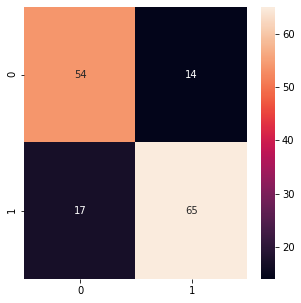

In [88]:
matrix = confusion_matrix(y_test, ypred_test)
data_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(data_cm, annot=True)
plt.show()